In [9]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [10]:
N = 2
M = 4

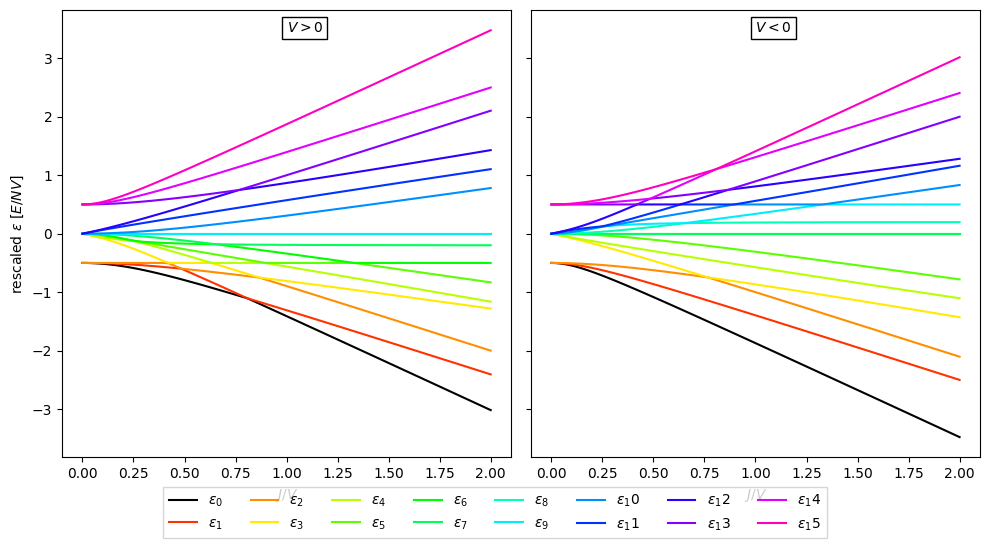

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), ncols=2, sharey=True)
cmap = get_cmap("gist_rainbow", M**N)

indices = np.arange(0, 100, 1)
J_V_ratio_routine = np.linspace(2, 0, 100)
mu_V_ratio_routine = np.linspace(0, 0, 100)

for V in [-1, 1]:
    ax = ax2 if V == -1 else ax1

    rescaled_energies = []

    for i in range(len(indices)):
        instantenous_hamiltonian = construct_rescaled_hamiltonian(
            N, M, V, mu_V_ratio=mu_V_ratio_routine[i], J_V_ratio=J_V_ratio_routine[i]
        )
        eigenvalues, eigenvectors = exact_diagonalize(instantenous_hamiltonian)
        rescaled_energies.append(eigenvalues * 1 / N)

    rescaled_energies = np.array(rescaled_energies)
    for i in range(M**N):
        if i == 0:
            if ax == ax1:
                ax.plot(J_V_ratio_routine, rescaled_energies[:, i], "-k", label="$\epsilon_0$")
            else:
                ax.plot(J_V_ratio_routine, rescaled_energies[:, i], "-k")
        else:
            if ax == ax1:
                ax.plot(J_V_ratio_routine, rescaled_energies[:, i], color=cmap(i), label=f"$\epsilon_{i}$")
            else:
                ax.plot(J_V_ratio_routine, rescaled_energies[:, i], color=cmap(i))
    text = "$V>0$" if np.sign(V) == 1 else "$V<0$"
    ax.set_xlabel("$J/V$")
    ax.text(
        0.5,
        0.975,
        text,
        transform=ax.transAxes,
        ha="left",
        va="top",
        bbox=dict(boxstyle="square", edgecolor="black", facecolor="none"),
        fontsize=10,
    )

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    fancybox=False,
    shadow=False,
    ncol=M**N//2,
)

ax1.set_ylabel("rescaled $\epsilon$ $[E/NV]$")
plt.tight_layout()
plt.subplots_adjust(bottom=0.075) 
